(0.53920291857791824, 0.84217587984758557)
Left -> Black
 Right -> Red


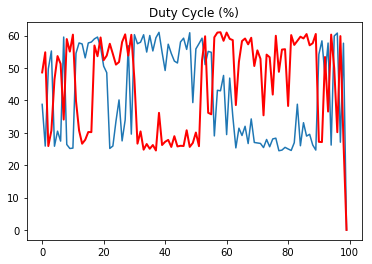

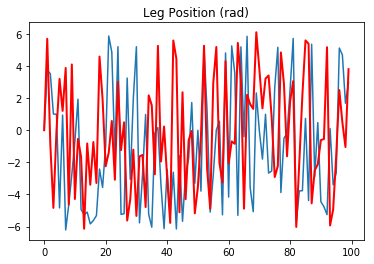

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
p1 = PdfPages('telem.pdf')
import math

### Visualizing forward simulation 



time_lim = 15


PWMVALS = np.load('../run_0/TRAJECTORIES/zigzag2_actions.npy')
LEGPOS = np.load('../run_0/TRAJECTORIES/zigzag2_executed.npy')


leftPWM = np.zeros(len(PWMVALS))
rightPWM = np.zeros(len(PWMVALS))

j = 0
for i in PWMVALS:
    leftPWM[j] = i[0] * 100.0 / 4096.0
    rightPWM[j] = i[1] * 100.0 / 4096.0
    j += 1
    



print (LEGPOS[0][18], LEGPOS[0][17])

leftLeg = np.zeros(len(LEGPOS))
rightLeg = np.zeros(len(LEGPOS))

j = 1



sinRight = 18 
cosRight  = 17
sinLeft = 16
cosLeft = 15

for i in LEGPOS[1:]:
    leftLeg[j] = np.arctan2(i[16] , i[15]) * 10.0 + leftLeg[j-1]
    rightLeg[j] = np.arctan2(i[18] , i[17]) * 10.0 + rightLeg[j-1]
    
    leftLeg[j] = np.fmod(leftLeg[j], 2 * np.pi)
    rightLeg[j] = np.fmod(rightLeg[j], 2 * np.pi)
    
    j += 1
    
print("Left -> Black\n Right -> Red")
plt.figure()

plt.title('Duty Cycle (%)')
plt.plot(leftPWM)
plt.plot(rightPWM, 'r-', linewidth=2)


plt.figure()
plt.title("Leg Position (rad)")
plt.plot(leftLeg)
plt.plot(rightLeg, 'r-', linewidth=2)




'''plt.figure()
plt.title('cos yaw')
plt.plot(states_true[0:time_lim, 0])
plt.plot(states_pred[0:time_lim, 0], 'r--', linewidth=2)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('sin yaw')
plt.plot(states_true[0:time_lim, 1])
plt.plot(states_pred[0:time_lim, 1], 'r--', linewidth=2)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('yaw')
roll_true = np.arctan2(states_true[0:time_lim, 1], states_true[0:time_lim, 0])
roll_pred = np.arctan2(states_pred[0:time_lim, 1], states_pred[0:time_lim, 0])
plt.plot(roll_true[0:time_lim])
plt.plot(roll_pred[0:time_lim], 'r--')'''

"""plt.figure()
plt.title('x pos')
plt.plot(states_true[0:time_lim, 0])
plt.plot(states_pred[0:time_lim, 0], 'r--', linewidth=2)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('y pos')
plt.plot(states_true[0:time_lim, 1])
plt.plot(states_pred[0:time_lim, 1], 'r--', linewidth=2)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('z pos')
plt.plot(states_true[0:time_lim, 2])
plt.plot(states_pred[0:time_lim, 2], 'r--', linewidth=2)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('x vel')
plt.plot(states_true[0:time_lim, 3])
plt.plot(states_pred[0:time_lim, 3], 'r--', linewidth=1.5)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('y vel')
plt.plot(states_true[0:time_lim, 4])
plt.plot(states_pred[0:time_lim, 4], 'r--', linewidth=1.5)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('z vel')
plt.plot(states_true[0:time_lim, 5])
plt.plot(states_pred[0:time_lim, 5], 'r--', linewidth=1.5)
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('roll')
roll_true = np.arctan2(states_true[0:time_lim, 7], states_true[0:time_lim, 6])
roll_pred = np.arctan2(states_pred[0:time_lim, 7], states_pred[0:time_lim, 6])
plt.plot(roll_true[0:time_lim])
plt.plot(roll_pred[0:time_lim], 'r--')
plt.savefig(p1, format='pdf')

plt.figure()
plt.title('pitch')
roll_true = np.arctan2(states_true[0:time_lim, 9], states_true[0:time_lim, 8])
roll_pred = np.arctan2(states_pred[0:time_lim, 9], states_pred[0:time_lim, 8])
plt.plot(roll_true[0:time_lim])
plt.plot(roll_pred[0:time_lim], 'r--')

"""
p1.close()